In [5]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

In [8]:
df = pd.read_csv('movies_dataset.csv')

#### O estudo inicial nao encotrou nenhuma relação direta

### Qual genero teve maior sucesso de notas e qual teve maior mediana de bilheteria?


In [ ]:
### Qual genero teve maior sucesso de notas e qual teve maior mediana de bilheteria?


# 1. Estudo de notas, ver media e mediana
df_agrouped_mean = df.groupby('Genre')['IMDbRating'].mean()
df_agrouped_mean = df_agrouped_mean.sort_values(ascending=False)
print(df_agrouped_mean.head())

df_agrouped_median = df.groupby('Genre')['IMDbRating'].median()
df_agrouped_median = df_agrouped_median.sort_values(ascending=False)
print(df_agrouped_median.head())


# Os numeros sao proximos, mas os de romance tem uma nota ligeiramente maior



# 2. Estudo de bilheteria
df_agrouped_median = df.groupby('Genre')['Global_BoxOfficeUSD'].median()
df_agrouped_median = df_agrouped_median.sort_values(ascending=False)
print(df_agrouped_median.head())


df_agrouped_mean = df.groupby('Genre')['Global_BoxOfficeUSD'].mean()
df_agrouped_mean = df_agrouped_mean.sort_values(ascending=False)
print(df_agrouped_mean.head())


# Filmes de estilo documentario tem uma bilheteria boa na mediana, o que pode significar uma escolha segura para investimento, mas ao falar de media, os filmes de sci-fi tem a melhor media

Genre
Romance   6.58
Action    6.51
Comedy    6.50
Sci-Fi    6.49
Drama     6.48
Name: IMDbRating, dtype: float64
Genre
Romance   6.60
Action    6.50
Drama     6.50
Horror    6.50
Sci-Fi    6.50
Name: IMDbRating, dtype: float64
Genre
Documentary   8959270.74
Action        8312636.19
Drama         8271970.04
Sci-Fi        7986930.95
Horror        7948003.75
Name: Global_BoxOfficeUSD, dtype: float64
Genre
Sci-Fi        31465406.14
Romance       28203450.54
Documentary   27528237.58
Horror        27493576.49
Drama         26963421.73
Name: Global_BoxOfficeUSD, dtype: float64


## Análises Avançadas e Visualizações

### 1. Análise de ROI (Return on Investment) por Gênero

/var/folders/j0/wprrqk_11z97m_6f5nz5bb640000gn/T/ipykernel_58761/419911000.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_genre.reset_index(),
/var/folders/j0/wprrqk_11z97m_6f5nz5bb640000gn/T/ipykernel_58761/419911000.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_roi_filtered,


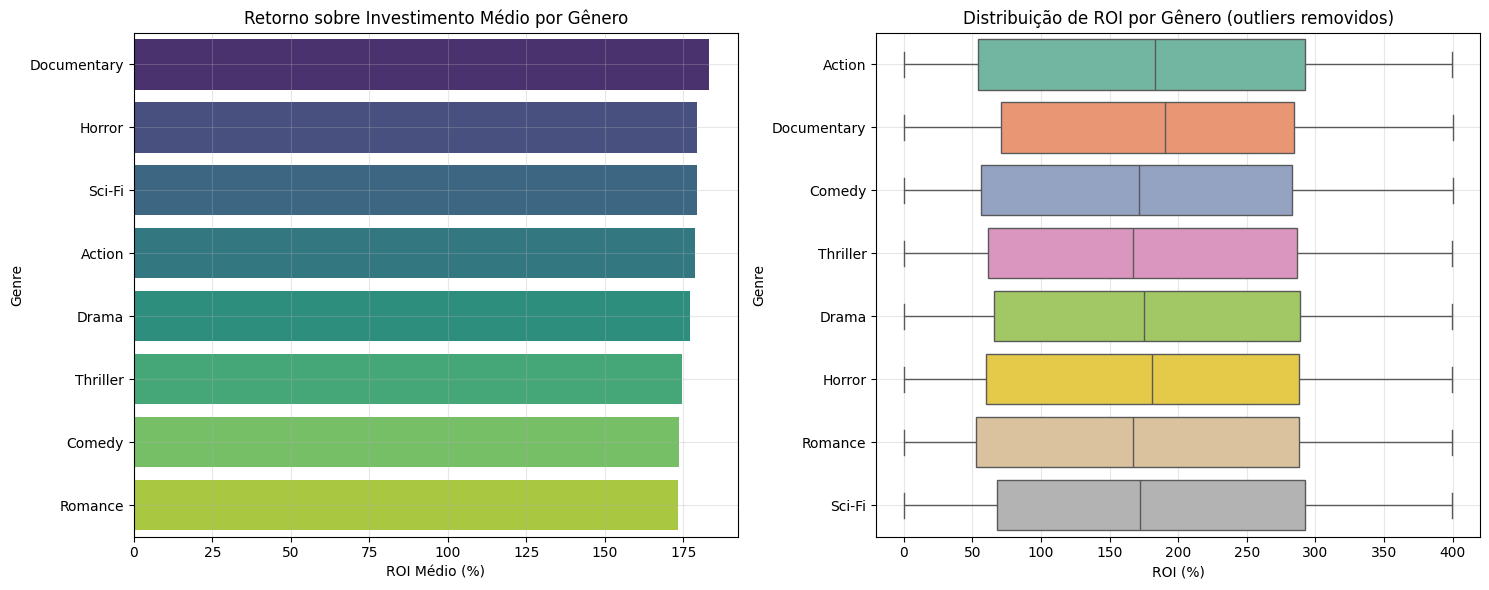

Top 5 Gêneros com Melhor ROI:
             ROI_Médio_%  ROI_Mediana_%  Quantidade_Filmes
Genre                                                     
Documentary       183.12         190.58                499
Horror            179.34         180.87                995
Sci-Fi            179.23         171.85                483
Action            178.67         182.92               1496
Drama             177.29         175.43               2400

Bottom 5 Gêneros com Pior ROI:
          ROI_Médio_%  ROI_Mediana_%  Quantidade_Filmes
Genre                                                  
Action         178.67         182.92               1496
Drama          177.29         175.43               2400
Thriller       174.53         166.97               1018
Comedy         173.74         171.80               2097
Romance        173.26         167.06               1012


In [ ]:
# Calculando ROI: (Bilheteria Global - Orçamento) / Orçamento * 100
df['ROI'] = ((df['Global_BoxOfficeUSD'] - df['BudgetUSD']) / df['BudgetUSD']) * 100

# ROI médio por gênero
roi_by_genre = df.groupby('Genre').agg({
    'ROI': ['mean', 'median'],
    'Title': 'count'
}).round(2)

roi_by_genre.columns = ['ROI_Médio_%', 'ROI_Mediana_%', 'Quantidade_Filmes']
roi_by_genre = roi_by_genre.sort_values('ROI_Médio_%', ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para ROI médio usando Seaborn
sns.barplot(data=roi_by_genre.reset_index(), 
            x='ROI_Médio_%', 
            y='Genre', 
            palette='viridis',
            ax=ax1)
ax1.set_xlabel('ROI Médio (%)')
ax1.set_title('Retorno sobre Investimento Médio por Gênero')
ax1.grid(True, alpha=0.3)

df_roi_filtered = df[df['ROI'] < 1000]  # Filtrando outliers extremos para melhor visualização
sns.boxplot(data=df_roi_filtered, 
            y='Genre', 
            x='ROI',
            palette='Set2',
            ax=ax2)
            
ax2.set_xlabel('ROI (%)')
ax2.set_title('Distribuição de ROI por Gênero (outliers removidos)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 5 Gêneros com Melhor ROI:")
print(roi_by_genre.head())
print("\n" + "="*50)
print("Bottom 5 Gêneros com Pior ROI:")
print(roi_by_genre.tail())

### 2. Análise de Tendências Temporais

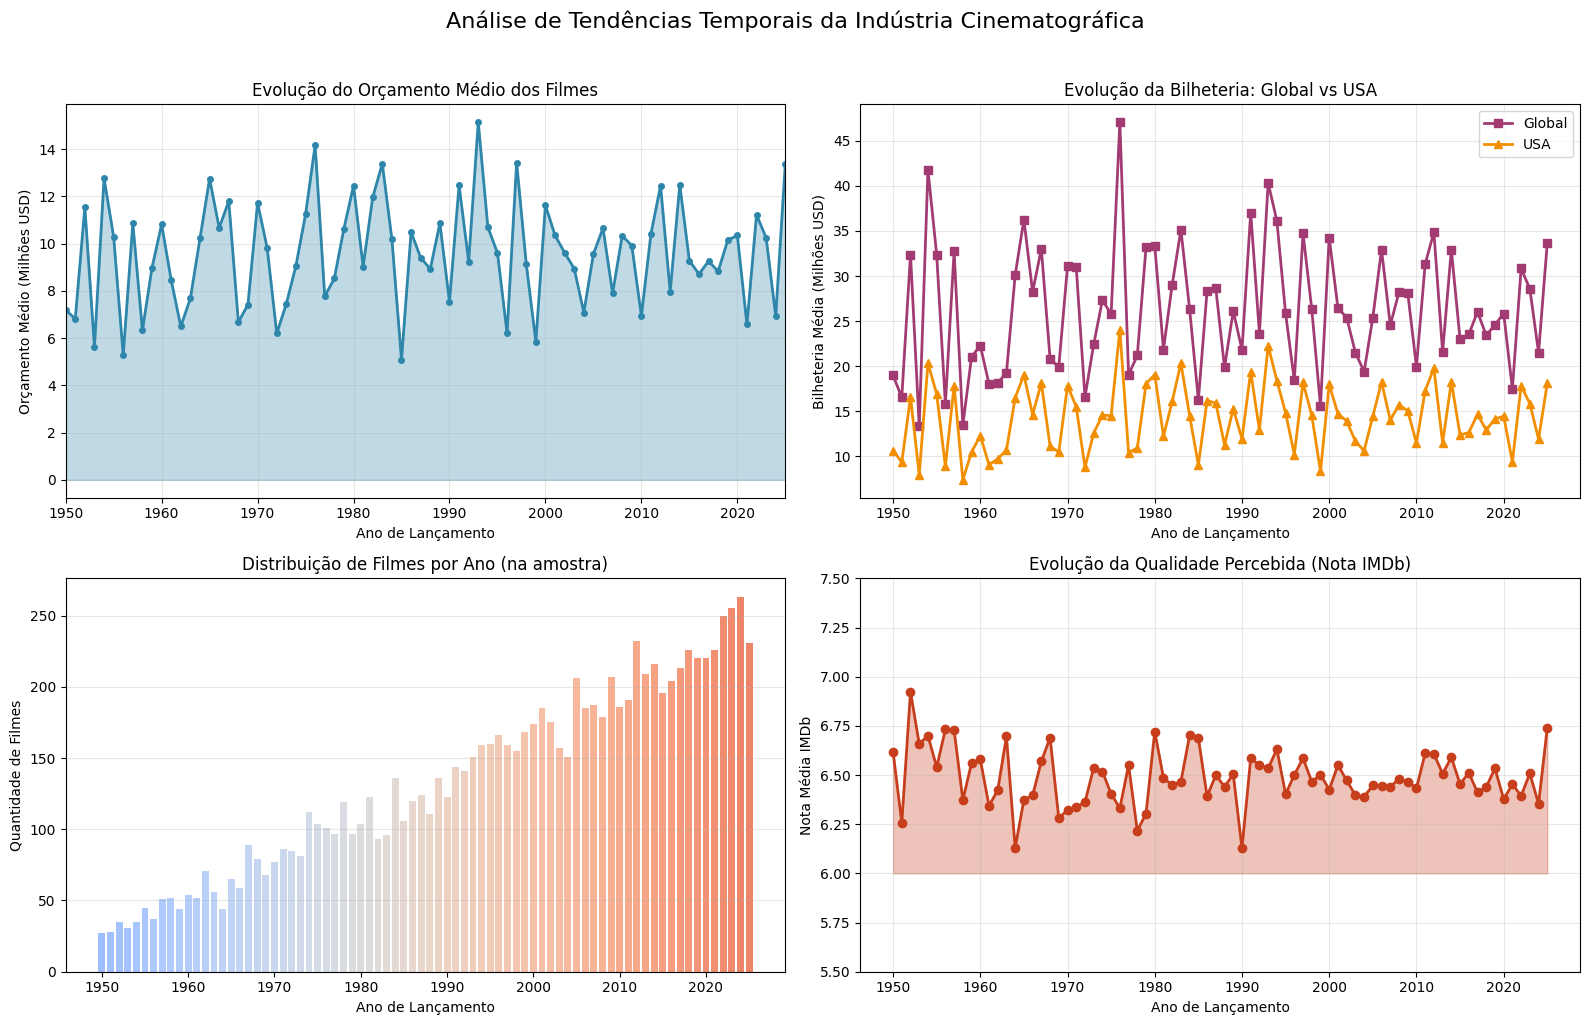


Análise por Década:
         BudgetUSD  Global_BoxOfficeUSD    ROI  IMDbRating
Decade                                                    
1950    8695085.50          24202051.38 176.54        6.61
1960    9271753.21          24785627.30 178.53        6.46
1970    9692662.52          27486877.47 172.45        6.39
1980   10114071.62          26310668.47 174.75        6.54
1990    9907362.91          27907524.94 178.85        6.50
2000    9644786.71          26792700.94 174.48        6.45
2010    9713584.01          26247497.26 178.96        6.51
2020    9757083.77          26334754.74 177.20        6.47


In [ ]:
# Análise temporal de orçamento e bilheteria
df_temporal = df.groupby('ReleaseYear').agg({
    'BudgetUSD': 'mean',
    'Global_BoxOfficeUSD': 'mean',
    'US_BoxOfficeUSD': 'mean',
    'IMDbRating': 'mean',
    'Title': 'count'
}).reset_index()

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Evolução do orçamento médio ao longo dos anos
ax1 = axes[0, 0]
ax1.plot(df_temporal['ReleaseYear'], df_temporal['BudgetUSD']/1e6, 
         marker='o', linewidth=2, markersize=4, color='#2E86AB')
ax1.fill_between(df_temporal['ReleaseYear'], df_temporal['BudgetUSD']/1e6, 
                  alpha=0.3, color='#2E86AB')
ax1.set_xlabel('Ano de Lançamento')
ax1.set_ylabel('Orçamento Médio (Milhões USD)')
ax1.set_title('Evolução do Orçamento Médio dos Filmes')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(df_temporal['ReleaseYear'].min(), df_temporal['ReleaseYear'].max())

# 2. Comparação Bilheteria Global vs US
ax2 = axes[0, 1]
ax2.plot(df_temporal['ReleaseYear'], df_temporal['Global_BoxOfficeUSD']/1e6, 
         label='Global', marker='s', linewidth=2, color='#A23B72')
ax2.plot(df_temporal['ReleaseYear'], df_temporal['US_BoxOfficeUSD']/1e6, 
         label='USA', marker='^', linewidth=2, color='#F18F01')
ax2.set_xlabel('Ano de Lançamento')
ax2.set_ylabel('Bilheteria Média (Milhões USD)')
ax2.set_title('Evolução da Bilheteria: Global vs USA')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# 3. Quantidade de filmes lançados por ano
ax3 = axes[1, 0]
bars = ax3.bar(df_temporal['ReleaseYear'], df_temporal['Title'], 
               color=plt.cm.coolwarm(np.linspace(0.3, 0.8, len(df_temporal))))
ax3.set_xlabel('Ano de Lançamento')
ax3.set_ylabel('Quantidade de Filmes')
ax3.set_title('Distribuição de Filmes por Ano (na amostra)')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Evolução da nota média IMDb
ax4 = axes[1, 1]
ax4.plot(df_temporal['ReleaseYear'], df_temporal['IMDbRating'], 
         marker='o', linewidth=2, markersize=6, color='#C73E1D')
ax4.fill_between(df_temporal['ReleaseYear'], df_temporal['IMDbRating'], 
                  6.0, alpha=0.3, color='#C73E1D')
ax4.set_xlabel('Ano de Lançamento')
ax4.set_ylabel('Nota Média IMDb')
ax4.set_title('Evolução da Qualidade Percebida (Nota IMDb)')
ax4.set_ylim(5.5, 7.5)
ax4.grid(True, alpha=0.3)

plt.suptitle('Análise de Tendências Temporais da Indústria Cinematográfica', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Análise de décadas
df['Decade'] = (df['ReleaseYear'] // 10) * 10
decade_analysis = df.groupby('Decade').agg({
    'BudgetUSD': 'mean',
    'Global_BoxOfficeUSD': 'mean',
    'ROI': 'mean',
    'IMDbRating': 'mean'
}).round(2)

print("\nAnálise por Década:")
print("="*60)
print(decade_analysis)

### 3. Mapa de Calor - Correlações entre Variáveis

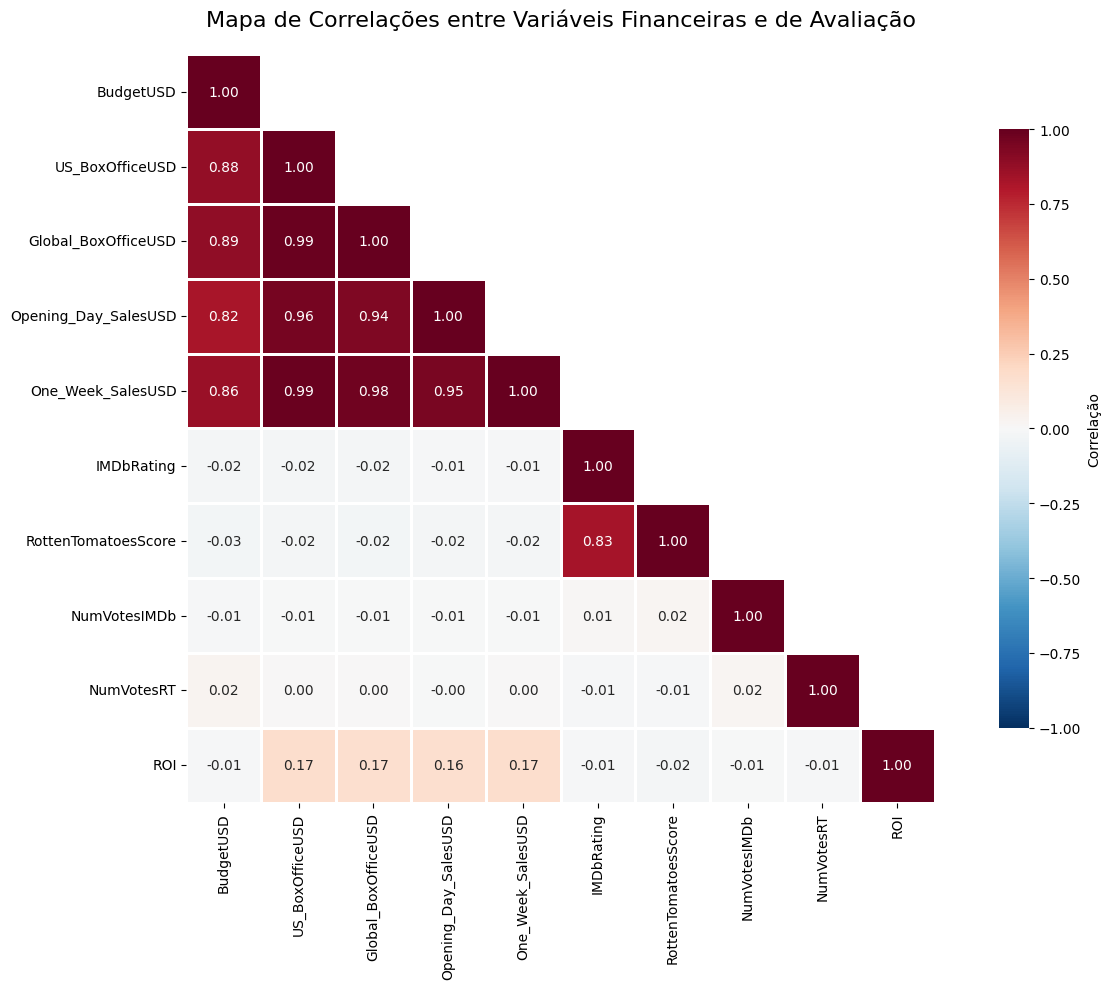


Correlações Fortes (|r| > 0.7):
BudgetUSD ↔ US_BoxOfficeUSD: 0.877
BudgetUSD ↔ Global_BoxOfficeUSD: 0.887
BudgetUSD ↔ Opening_Day_SalesUSD: 0.821
BudgetUSD ↔ One_Week_SalesUSD: 0.864
US_BoxOfficeUSD ↔ Global_BoxOfficeUSD: 0.985
US_BoxOfficeUSD ↔ Opening_Day_SalesUSD: 0.959
US_BoxOfficeUSD ↔ One_Week_SalesUSD: 0.992
Global_BoxOfficeUSD ↔ Opening_Day_SalesUSD: 0.935
Global_BoxOfficeUSD ↔ One_Week_SalesUSD: 0.975
Opening_Day_SalesUSD ↔ One_Week_SalesUSD: 0.952
IMDbRating ↔ RottenTomatoesScore: 0.828


In [ ]:
# Selecionando variáveis numéricas para correlação
numeric_cols = ['BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 
                'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 
                'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'ROI']

# Calculando a matriz de correlação
correlation_matrix = df[numeric_cols].corr()

# Criando o mapa de calor
fig, ax = plt.subplots(figsize=(14, 10))

# Mapa de calor customizado
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Correlação"},
            vmin=-1, vmax=1)

plt.title('Mapa de Correlações entre Variáveis Financeiras e de Avaliação', 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identificando as correlações mais fortes
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlação': round(correlation_matrix.iloc[i, j], 3)
            })

if strong_correlations:
    print("\nCorrelações Fortes (|r| > 0.7):")
    print("="*60)
    for corr in strong_correlations:
        print(f"{corr['Var1']} ↔ {corr['Var2']}: {corr['Correlação']}")
else:
    print("\nNenhuma correlação forte (|r| > 0.7) encontrada entre as variáveis.")

### 4. Top Diretores e Atores por Performance

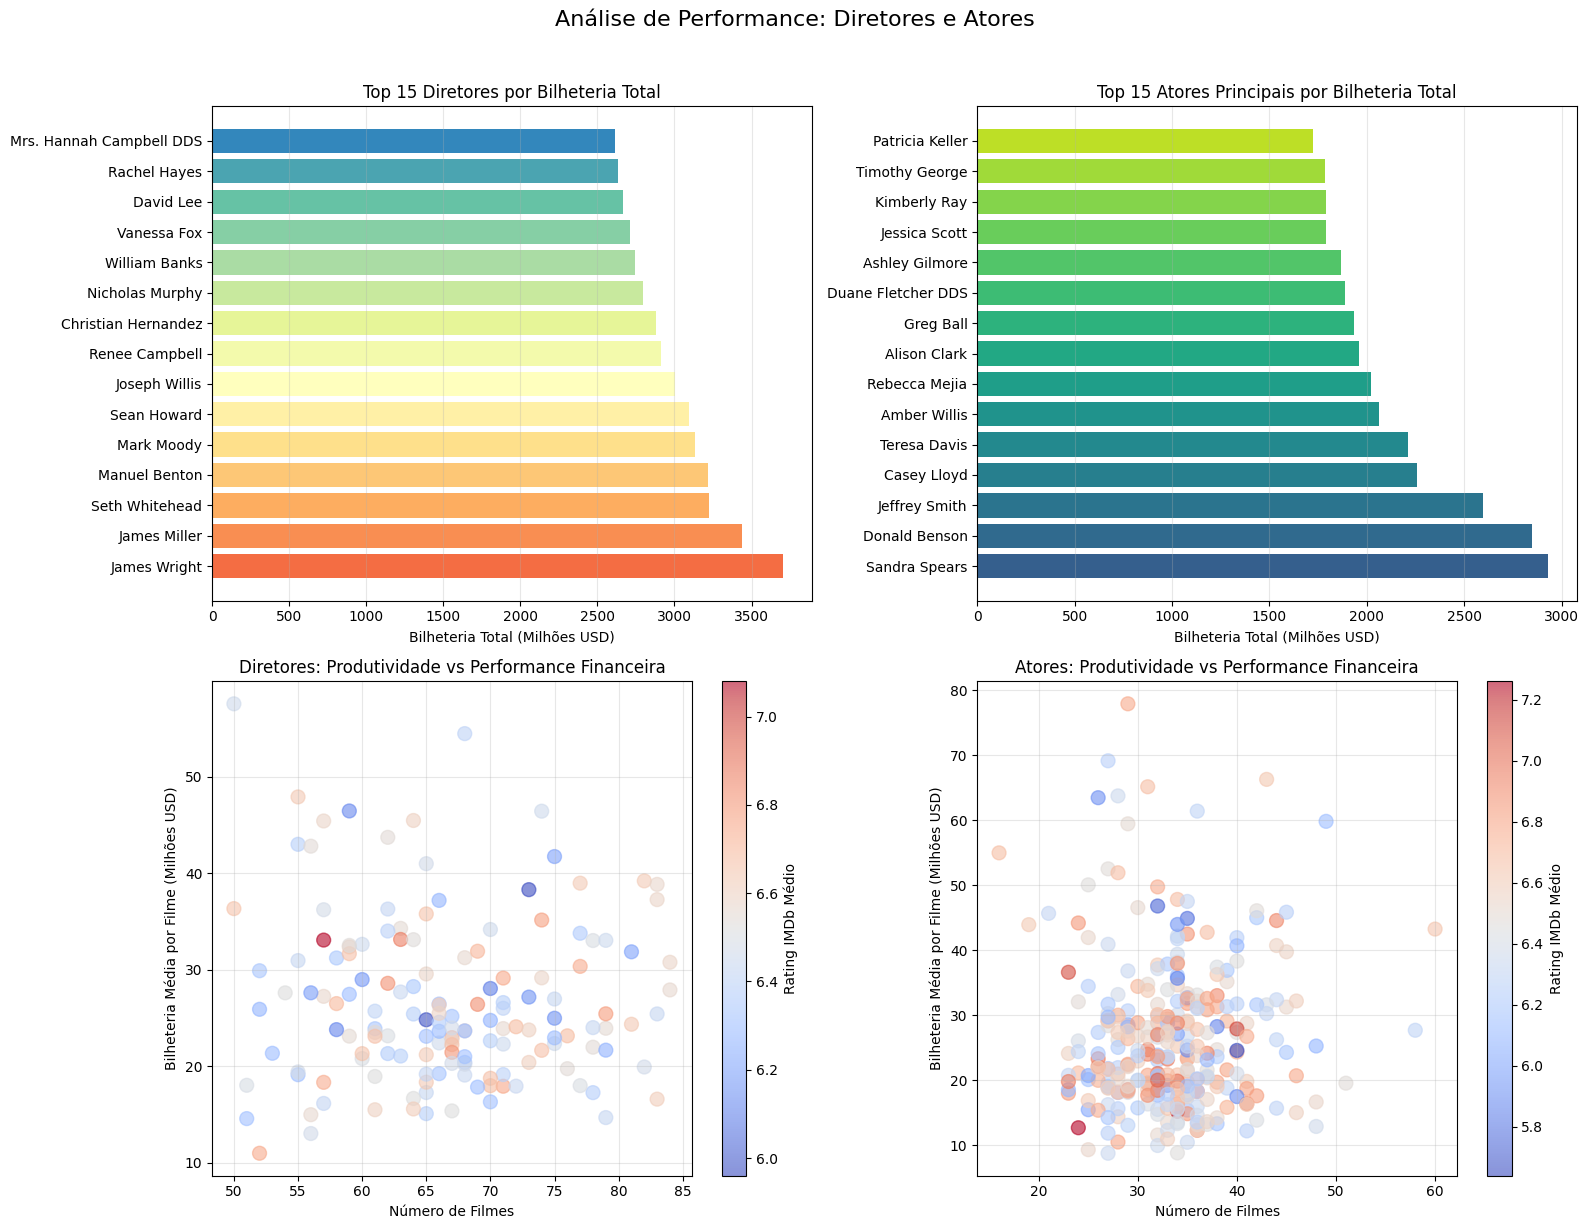


Top 10 Diretores por Bilheteria Total:
                     Total_Bilheteria  Num_Filmes  Bilheteria_por_Filme
Director                                                               
James Wright            3704738993.77          68           54481455.79
James Miller            3436806975.87          74           46443337.51
Seth Whitehead          3225176921.77          83           38857553.27
Manuel Benton           3216026914.92          82           39219840.43
Mark Moody              3130762728.62          75           41743503.05
Sean Howard             3094128265.75          83           37278653.80
Joseph Willis           3001693514.96          77           38983032.66
Renee Campbell          2910679742.31          64           45479370.97
Christian Hernandez     2878544022.77          50           57570880.46
Nicholas Murphy         2796694346.77          73           38310881.46

Top 10 Atores por Bilheteria Total:
                    Total_Bilheteria  Num_Filmes  Bilheteri

In [ ]:
# Análise de diretores
directors_stats = df.groupby('Director').agg({
    'Global_BoxOfficeUSD': 'sum',
    'Title': 'count',
    'IMDbRating': 'mean',
    'ROI': 'mean'
}).round(2)

directors_stats.columns = ['Total_Bilheteria', 'Num_Filmes', 'Rating_Médio', 'ROI_Médio']
directors_stats['Bilheteria_por_Filme'] = (directors_stats['Total_Bilheteria'] / 
                                           directors_stats['Num_Filmes']).round(2)

# Filtrar diretores com pelo menos 2 filmes
directors_stats_filtered = directors_stats[directors_stats['Num_Filmes'] >= 2]

# Top 15 diretores por bilheteria total
top_directors_revenue = directors_stats_filtered.nlargest(15, 'Total_Bilheteria')

# Análise de atores
actors_stats = df.groupby('LeadActor').agg({
    'Global_BoxOfficeUSD': 'sum',
    'Title': 'count',
    'IMDbRating': 'mean',
    'ROI': 'mean'
}).round(2)

actors_stats.columns = ['Total_Bilheteria', 'Num_Filmes', 'Rating_Médio', 'ROI_Médio']
actors_stats['Bilheteria_por_Filme'] = (actors_stats['Total_Bilheteria'] / 
                                        actors_stats['Num_Filmes']).round(2)

# Filtrar atores com pelo menos 2 filmes
actors_stats_filtered = actors_stats[actors_stats['Num_Filmes'] >= 2]

# Top 15 atores por bilheteria total
top_actors_revenue = actors_stats_filtered.nlargest(15, 'Total_Bilheteria')

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top diretores por bilheteria total
ax1 = axes[0, 0]
colors1 = plt.cm.Spectral(np.linspace(0.2, 0.9, len(top_directors_revenue)))
ax1.barh(range(len(top_directors_revenue)), 
         top_directors_revenue['Total_Bilheteria']/1e6,
         color=colors1)
ax1.set_yticks(range(len(top_directors_revenue)))
ax1.set_yticklabels(top_directors_revenue.index)
ax1.set_xlabel('Bilheteria Total (Milhões USD)')
ax1.set_title('Top 15 Diretores por Bilheteria Total')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Top atores por bilheteria total
ax2 = axes[0, 1]
colors2 = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_actors_revenue)))
ax2.barh(range(len(top_actors_revenue)), 
         top_actors_revenue['Total_Bilheteria']/1e6,
         color=colors2)
ax2.set_yticks(range(len(top_actors_revenue)))
ax2.set_yticklabels(top_actors_revenue.index)
ax2.set_xlabel('Bilheteria Total (Milhões USD)')
ax2.set_title('Top 15 Atores Principais por Bilheteria Total')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Scatter plot: Número de filmes vs Bilheteria média (Diretores)
ax3 = axes[1, 0]
scatter1 = ax3.scatter(directors_stats_filtered['Num_Filmes'], 
                       directors_stats_filtered['Bilheteria_por_Filme']/1e6,
                       c=directors_stats_filtered['Rating_Médio'],
                       s=100, alpha=0.6, cmap='coolwarm')
ax3.set_xlabel('Número de Filmes')
ax3.set_ylabel('Bilheteria Média por Filme (Milhões USD)')
ax3.set_title('Diretores: Produtividade vs Performance Financeira')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax3, label='Rating IMDb Médio')

# 4. Scatter plot: Número de filmes vs Bilheteria média (Atores)
ax4 = axes[1, 1]
scatter2 = ax4.scatter(actors_stats_filtered['Num_Filmes'], 
                       actors_stats_filtered['Bilheteria_por_Filme']/1e6,
                       c=actors_stats_filtered['Rating_Médio'],
                       s=100, alpha=0.6, cmap='coolwarm')
ax4.set_xlabel('Número de Filmes')
ax4.set_ylabel('Bilheteria Média por Filme (Milhões USD)')
ax4.set_title('Atores: Produtividade vs Performance Financeira')
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax4, label='Rating IMDb Médio')

plt.suptitle('Análise de Performance: Diretores e Atores', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nTop 10 Diretores por Bilheteria Total:")
print("="*60)
print(top_directors_revenue.head(10)[['Total_Bilheteria', 'Num_Filmes', 'Bilheteria_por_Filme']])
print("\nTop 10 Atores por Bilheteria Total:")
print("="*60)
print(top_actors_revenue.head(10)[['Total_Bilheteria', 'Num_Filmes', 'Bilheteria_por_Filme']])

### 5. Análise Comparativa entre Países

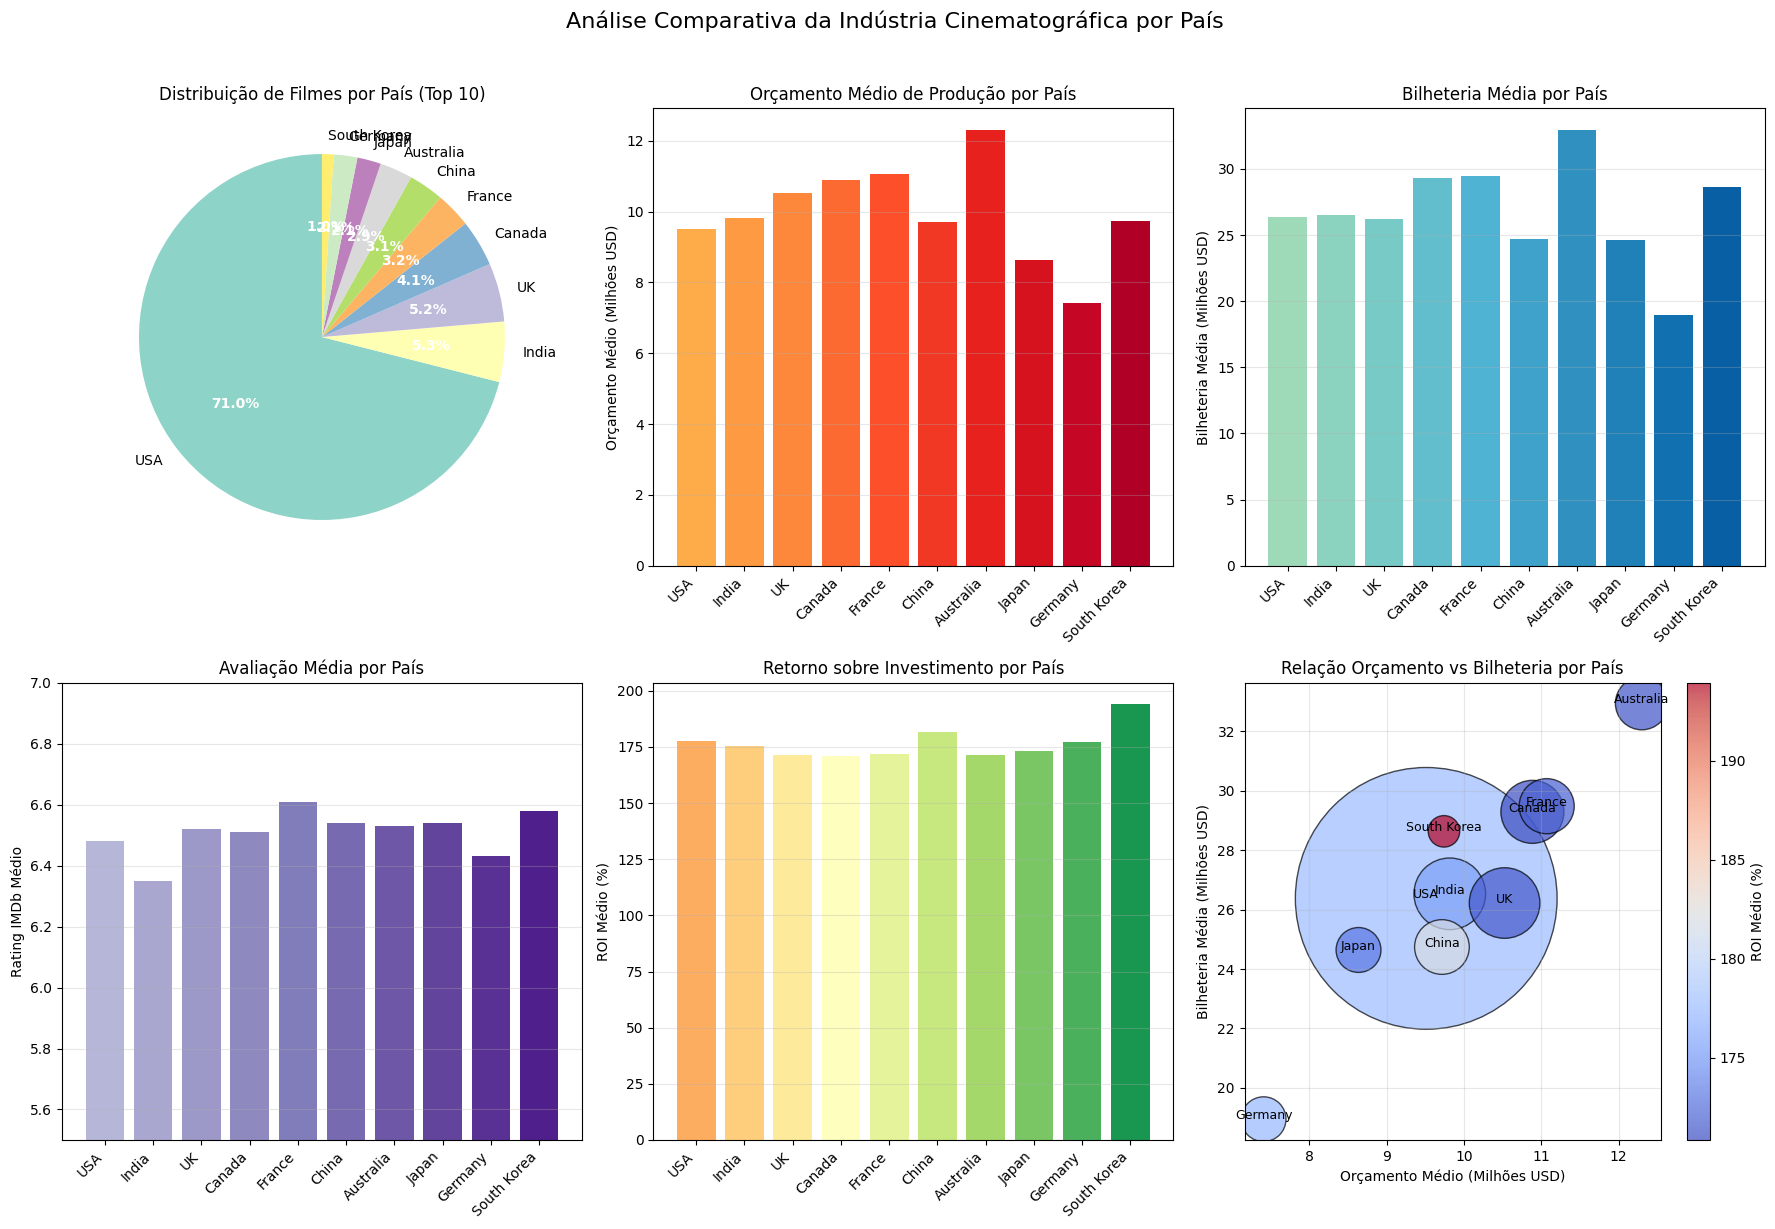


Estatísticas dos Top 10 Países Produtores:
             Num_Filmes  Orçamento_Médio  Bilheteria_Média  Rating_Médio  \
Country                                                                    
USA                7104       9511942.53       26376382.49          6.48   
India               532       9816229.32       26529769.11          6.35   
UK                  517      10525596.08       26220299.96          6.52   
Canada              412      10885381.88       29287746.15          6.51   
France              315      11069827.90       29479141.67          6.61   
China               310       9714979.14       24740234.36          6.54   
Australia           290      12300673.20       32937511.88          6.53   
Japan               209       8636207.24       24640413.51          6.54   
Germany             208       7408366.27       18947226.69          6.43   
South Korea         103       9741340.01       28631904.19          6.58   

             ROI_Médio  
Country           

In [ ]:
# Análise por país
country_stats = df.groupby('Country').agg({
    'Title': 'count',
    'BudgetUSD': 'mean',
    'Global_BoxOfficeUSD': 'mean',
    'IMDbRating': 'mean',
    'ROI': 'mean'
}).round(2)

country_stats.columns = ['Num_Filmes', 'Orçamento_Médio', 'Bilheteria_Média', 'Rating_Médio', 'ROI_Médio']

# Top 10 países por número de filmes
top_countries = country_stats.nlargest(10, 'Num_Filmes')

# Criar visualizações
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribuição de filmes por país
ax1 = axes[0, 0]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(top_countries)))
wedges, texts, autotexts = ax1.pie(top_countries['Num_Filmes'], 
                                    labels=top_countries.index,
                                    autopct='%1.1f%%',
                                    colors=colors_pie,
                                    startangle=90)
ax1.set_title('Distribuição de Filmes por País (Top 10)')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

# 2. Orçamento médio por país
ax2 = axes[0, 1]
bars1 = ax2.bar(range(len(top_countries)), 
                top_countries['Orçamento_Médio']/1e6,
                color=plt.cm.YlOrRd(np.linspace(0.4, 0.9, len(top_countries))))
ax2.set_xticks(range(len(top_countries)))
ax2.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax2.set_ylabel('Orçamento Médio (Milhões USD)')
ax2.set_title('Orçamento Médio de Produção por País')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Bilheteria média por país
ax3 = axes[0, 2]
bars2 = ax3.bar(range(len(top_countries)), 
                top_countries['Bilheteria_Média']/1e6,
                color=plt.cm.GnBu(np.linspace(0.4, 0.9, len(top_countries))))
ax3.set_xticks(range(len(top_countries)))
ax3.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax3.set_ylabel('Bilheteria Média (Milhões USD)')
ax3.set_title('Bilheteria Média por País')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Rating médio por país
ax4 = axes[1, 0]
bars3 = ax4.bar(range(len(top_countries)), 
                top_countries['Rating_Médio'],
                color=plt.cm.Purples(np.linspace(0.4, 0.9, len(top_countries))))
ax4.set_xticks(range(len(top_countries)))
ax4.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax4.set_ylabel('Rating IMDb Médio')
ax4.set_title('Avaliação Média por País')
ax4.set_ylim(5.5, 7)
ax4.grid(True, alpha=0.3, axis='y')

# 5. ROI médio por país
ax5 = axes[1, 1]
bars4 = ax5.bar(range(len(top_countries)), 
                top_countries['ROI_Médio'],
                color=plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_countries))))
ax5.set_xticks(range(len(top_countries)))
ax5.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax5.set_ylabel('ROI Médio (%)')
ax5.set_title('Retorno sobre Investimento por País')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Scatter: Orçamento vs Bilheteria por país
ax6 = axes[1, 2]
scatter = ax6.scatter(top_countries['Orçamento_Médio']/1e6,
                     top_countries['Bilheteria_Média']/1e6,
                     s=top_countries['Num_Filmes']*5,
                     c=top_countries['ROI_Médio'],
                     cmap='coolwarm',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=1)

# Adicionar labels para cada país
for idx, country in enumerate(top_countries.index):
    ax6.annotate(country, 
                (top_countries['Orçamento_Médio'].iloc[idx]/1e6,
                 top_countries['Bilheteria_Média'].iloc[idx]/1e6),
                fontsize=9, ha='center')

ax6.set_xlabel('Orçamento Médio (Milhões USD)')
ax6.set_ylabel('Bilheteria Média (Milhões USD)')
ax6.set_title('Relação Orçamento vs Bilheteria por País')
ax6.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax6, label='ROI Médio (%)')

plt.suptitle('Análise Comparativa da Indústria Cinematográfica por País', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nEstatísticas dos Top 10 Países Produtores:")
print("="*70)
print(top_countries)

# Análise de proporção Internacional vs Doméstica
df['International_BoxOffice'] = df['Global_BoxOfficeUSD'] - df['US_BoxOfficeUSD']
df['International_Percentage'] = (df['International_BoxOffice'] / df['Global_BoxOfficeUSD'] * 100)

international_by_country = df.groupby('Country')['International_Percentage'].mean().round(2)
print("\n\nPercentual Médio de Bilheteria Internacional por País:")
print("="*70)
print(international_by_country.nlargest(10))

### 6. Análise de Performance: Abertura vs Bilheteria Total

/var/folders/j0/wprrqk_11z97m_6f5nz5bb640000gn/T/ipykernel_58761/926406710.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax5.boxplot(decades_data, labels=decade_labels, patch_artist=True)


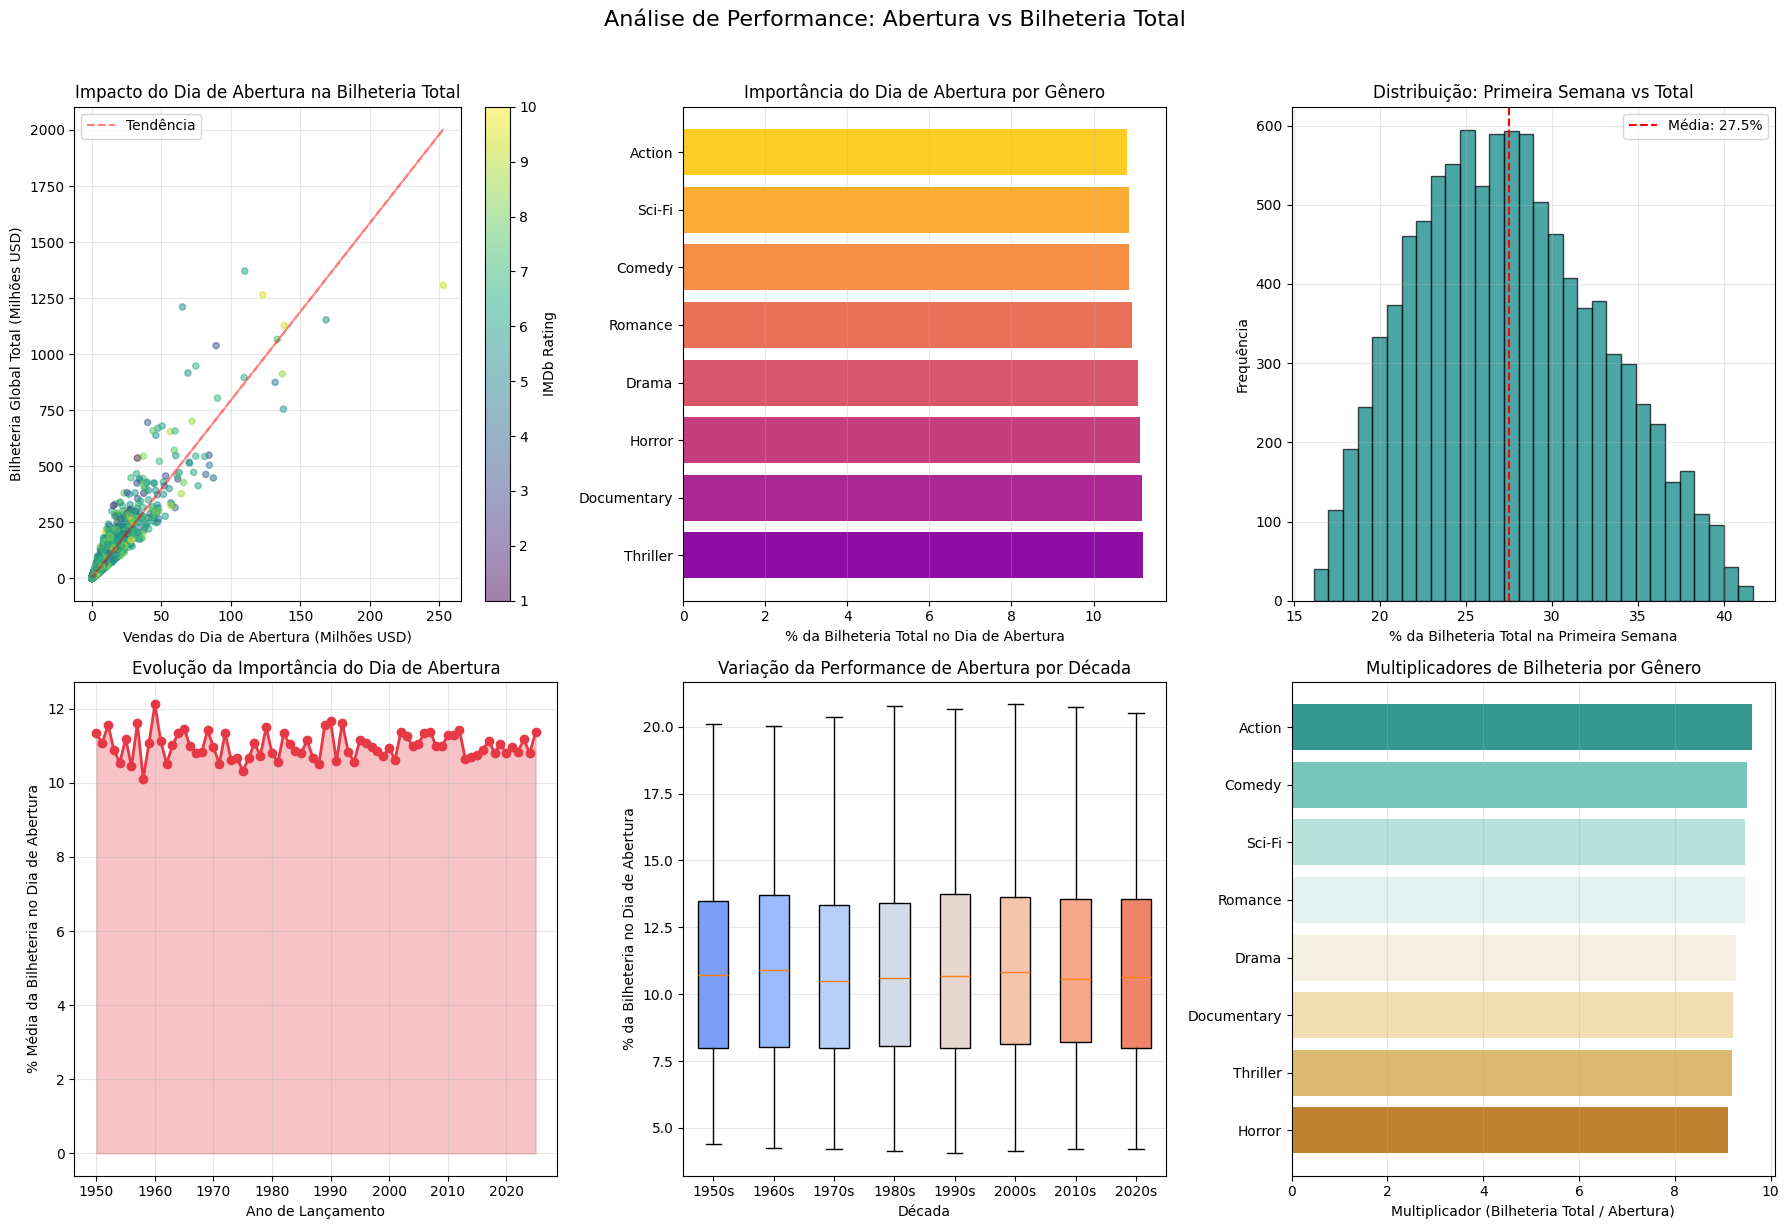


Estatísticas de Performance de Abertura:
Média de Bilheteria no Dia de Abertura: 11.00%
Média de Bilheteria na Primeira Semana: 27.49%
Multiplicador Médio (Total/Abertura): 9.38x


Top 5 Gêneros com Melhor Sustentação (Maior Multiplicador):
Genre
Drama     9.28
Romance   9.46
Sci-Fi    9.46
Comedy    9.50
Action    9.61
Name: Multiplier, dtype: float64


Top 5 Gêneros mais Front-Loaded (Menor Multiplicador):
Genre
Horror        9.10
Thriller      9.20
Documentary   9.21
Drama         9.28
Romance       9.46
Name: Multiplier, dtype: float64


In [ ]:
# Análise de performance de abertura
df['Opening_to_Total_Ratio'] = (df['Opening_Day_SalesUSD'] / df['Global_BoxOfficeUSD'] * 100)
df['Week_to_Total_Ratio'] = (df['One_Week_SalesUSD'] / df['Global_BoxOfficeUSD'] * 100)
df['Opening_to_Week_Ratio'] = (df['Opening_Day_SalesUSD'] / df['One_Week_SalesUSD'] * 100)

# Criar visualizações
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Relação entre vendas de abertura e bilheteria total
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df['Opening_Day_SalesUSD']/1e6, 
                      df['Global_BoxOfficeUSD']/1e6,
                      alpha=0.5, s=20, c=df['IMDbRating'], cmap='viridis')
ax1.set_xlabel('Vendas do Dia de Abertura (Milhões USD)')
ax1.set_ylabel('Bilheteria Global Total (Milhões USD)')
ax1.set_title('Impacto do Dia de Abertura na Bilheteria Total')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='IMDb Rating')

# Adicionar linha de tendência
z = np.polyfit(df['Opening_Day_SalesUSD'], df['Global_BoxOfficeUSD'], 1)
p = np.poly1d(z)
ax1.plot(df['Opening_Day_SalesUSD']/1e6, p(df['Opening_Day_SalesUSD'])/1e6, 
         "r--", alpha=0.5, label=f'Tendência')
ax1.legend()

# 2. Proporção de abertura por gênero
ax2 = axes[0, 1]
opening_by_genre = df.groupby('Genre')['Opening_to_Total_Ratio'].mean().sort_values(ascending=False)
colors2 = plt.cm.plasma(np.linspace(0.3, 0.9, len(opening_by_genre)))
bars1 = ax2.barh(range(len(opening_by_genre)), opening_by_genre.values, color=colors2)
ax2.set_yticks(range(len(opening_by_genre)))
ax2.set_yticklabels(opening_by_genre.index)
ax2.set_xlabel('% da Bilheteria Total no Dia de Abertura')
ax2.set_title('Importância do Dia de Abertura por Gênero')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Distribuição da proporção semana/total
ax3 = axes[0, 2]
ax3.hist(df['Week_to_Total_Ratio'], bins=30, color='teal', alpha=0.7, edgecolor='black')
ax3.axvline(df['Week_to_Total_Ratio'].mean(), color='red', linestyle='--', 
           label=f'Média: {df["Week_to_Total_Ratio"].mean():.1f}%')
ax3.set_xlabel('% da Bilheteria Total na Primeira Semana')
ax3.set_ylabel('Frequência')
ax3.set_title('Distribuição: Primeira Semana vs Total')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Performance de abertura ao longo do tempo
ax4 = axes[1, 0]
yearly_opening = df.groupby('ReleaseYear')['Opening_to_Total_Ratio'].mean()
ax4.plot(yearly_opening.index, yearly_opening.values, marker='o', linewidth=2, color='#E63946')
ax4.fill_between(yearly_opening.index, yearly_opening.values, alpha=0.3, color='#E63946')
ax4.set_xlabel('Ano de Lançamento')
ax4.set_ylabel('% Média da Bilheteria no Dia de Abertura')
ax4.set_title('Evolução da Importância do Dia de Abertura')
ax4.grid(True, alpha=0.3)

# 5. Box plot: Proporção de abertura por década
ax5 = axes[1, 1]
decades_data = []
decade_labels = []
for decade in sorted(df['Decade'].unique()):
    decade_data = df[df['Decade'] == decade]['Opening_to_Total_Ratio'].values
    if len(decade_data) > 0:
        decades_data.append(decade_data)
        decade_labels.append(f"{int(decade)}s")

bp = ax5.boxplot(decades_data, labels=decade_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.coolwarm(np.linspace(0.2, 0.8, len(bp['boxes'])))):
    patch.set_facecolor(color)
ax5.set_xlabel('Década')
ax5.set_ylabel('% da Bilheteria no Dia de Abertura')
ax5.set_title('Variação da Performance de Abertura por Década')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Análise de multiplicadores
ax6 = axes[1, 2]
df['Multiplier'] = df['Global_BoxOfficeUSD'] / df['Opening_Day_SalesUSD']
multiplier_by_genre = df.groupby('Genre')['Multiplier'].median().sort_values()
colors6 = plt.cm.BrBG(np.linspace(0.2, 0.8, len(multiplier_by_genre)))
bars2 = ax6.barh(range(len(multiplier_by_genre)), multiplier_by_genre.values, color=colors6)
ax6.set_yticks(range(len(multiplier_by_genre)))
ax6.set_yticklabels(multiplier_by_genre.index)
ax6.set_xlabel('Multiplicador (Bilheteria Total / Abertura)')
ax6.set_title('Multiplicadores de Bilheteria por Gênero')
ax6.grid(True, alpha=0.3, axis='x')

plt.suptitle('Análise de Performance: Abertura vs Bilheteria Total', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Estatísticas detalhadas
print("\nEstatísticas de Performance de Abertura:")
print("="*60)
print(f"Média de Bilheteria no Dia de Abertura: {df['Opening_to_Total_Ratio'].mean():.2f}%")
print(f"Média de Bilheteria na Primeira Semana: {df['Week_to_Total_Ratio'].mean():.2f}%")
print(f"Multiplicador Médio (Total/Abertura): {df['Multiplier'].median():.2f}x")

print("\n\nTop 5 Gêneros com Melhor Sustentação (Maior Multiplicador):")
print("="*60)
print(multiplier_by_genre.tail())

print("\n\nTop 5 Gêneros mais Front-Loaded (Menor Multiplicador):")
print("="*60)
print(multiplier_by_genre.head())